In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import calendar as cal

from sklearn.preprocessing import LabelEncoder

In [3]:
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)

In [4]:
print(df_train.shape)
print(df_train_label.shape)
print(df_test.shape)
print(df_test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


##### identifying the categorical columns

In [5]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
dtype: int64

In [6]:
trainDF = df_train.join(df_train_label)
testDF = df_test.join(df_train_label)
trainDF = trainDF.rename(columns={0:"Bookings"})
testDF = testDF.rename(columns={0:"Bookings"})
trainDF.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  Bookings  
0  25.760        77    16.9979       504  
1  33.335        79    19.0012         5  
2   6.060        50    22.0028       139  
3  16.665        29     8.9981       209  
4  33.335        51    19.0012       184

##### Missing Value Analysis

In [7]:
trainDF.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

In [8]:
testDF.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

There is no missing value in training set

#### identifying the categorical columns and plotting the graph in single go

In [9]:
catColumns = []
test = df_test.nunique()
for k, v in enumerate(test):
    if(v < 20):
        catColumns.append(trainDF.columns[k])
catColumns

['season', 'holiday', 'workingday', 'weather']

<Figure size 432x288 with 0 Axes>

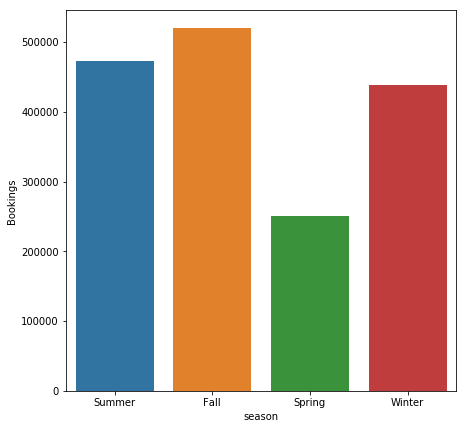

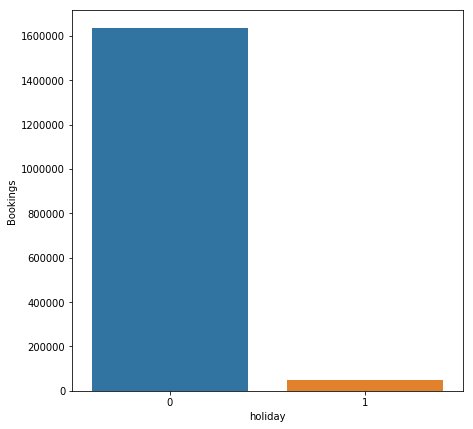

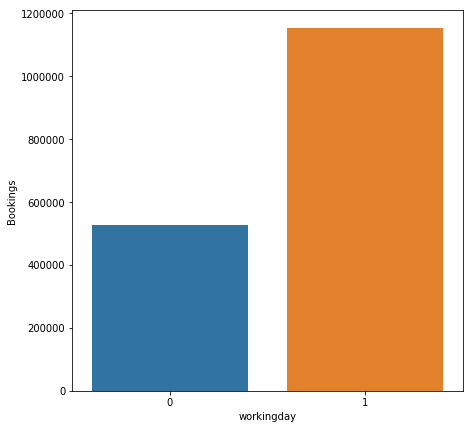

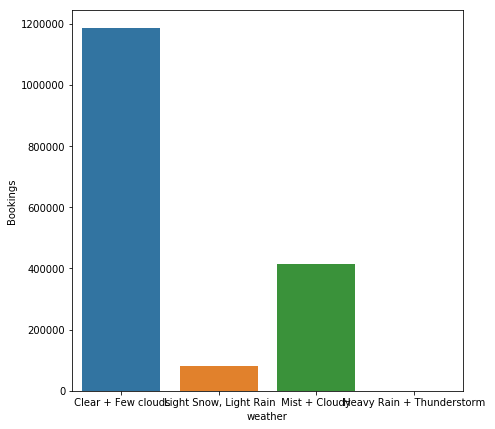

In [10]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(7,7))
    sns.barplot(x=trainDF[item], y='Bookings', data=trainDF, estimator=sum, ci=None)

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

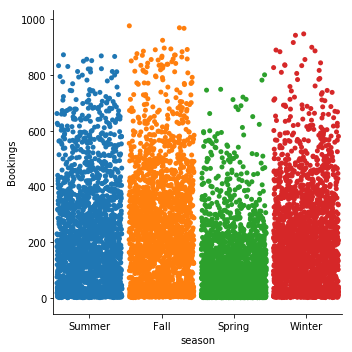

<Figure size 864x864 with 0 Axes>

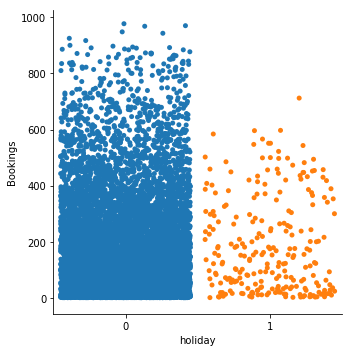

<Figure size 864x864 with 0 Axes>

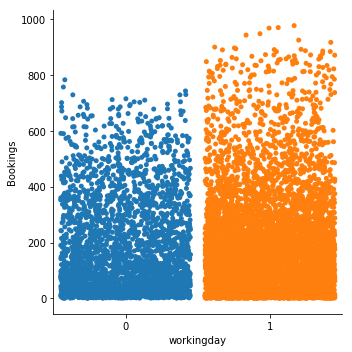

<Figure size 864x864 with 0 Axes>

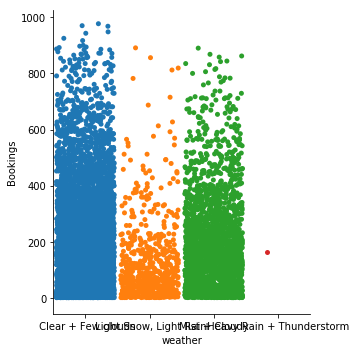

In [11]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(12,12))
    sns.catplot(x=item, y='Bookings', data=trainDF, jitter='0.45')

## Outlier Analysis

In [12]:
trainDF.Bookings.describe()

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Bookings, dtype: float64

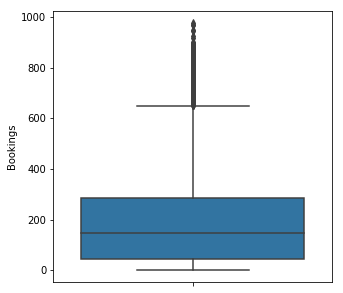

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(y=trainDF.Bookings)

In [14]:
stdDf = np.std(trainDF.Bookings)
varDf = np.var(trainDF.Bookings)
meanDf = np.mean(trainDF.Bookings)
print('StdD: ', stdDf, '\nVar: ', varDf, '\nmeanDf: ', meanDf)

StdD:  181.54178620709257 
Var:  32957.42013926171 
meanDf:  193.00700505282498


In [15]:
upperRange = meanDf + 3*stdDf
lowerRange = meanDf - 3*stdDf
print('Range of values should be: ', lowerRange, ' to ', upperRange)
print('Actual Range of values should be: ', 0, ' to ', int(np.round(upperRange,0)))

Range of values should be:  -351.6183535684527  to  737.6323636741026
Actual Range of values should be:  0  to  738


In [16]:
trainDF1 = df_train.join(df_train_label)
print(trainDF1.shape)

(8708, 10)


In [17]:
trainDF = trainDF[trainDF.Bookings < int(np.round(upperRange,0))]
train_test_splitter = trainDF.shape[0]
print(trainDF.shape)

(8591, 10)


## Feature Engineering

In [18]:
merged = pd.concat([trainDF, testDF])
merged.shape

(10769, 10)

##### creating new columns date, hour, month and weekday from the datetime column.

In [19]:
merged['date'] = merged.datetime.apply(lambda x : x.split()[0])
merged['hour'] = merged.datetime.apply(lambda x : x.split()[1].split(':')[0])
merged['month'] = merged.date.apply(lambda x : cal.month_name[dt.datetime.strptime(x, '%m/%d/%Y').month])
merged['weekday'] = merged.date.apply(lambda x : cal.day_name[dt.datetime.strptime(x, '%m/%d/%Y').weekday()])

In [20]:
nuniques = merged.nunique()
catColumns = []
for k, v in enumerate(nuniques):
    if(v < 10):
        catColumns.append(merged.columns[k])
        #merged[trainDF.columns[k]] = merged[trainDF.columns[k]].astype('category')
catColumns

['season', 'holiday', 'workingday', 'weather', 'weekday']

In [21]:
for item in catColumns:
    merged[item] = merged[item].astype('category')

<Figure size 432x288 with 0 Axes>

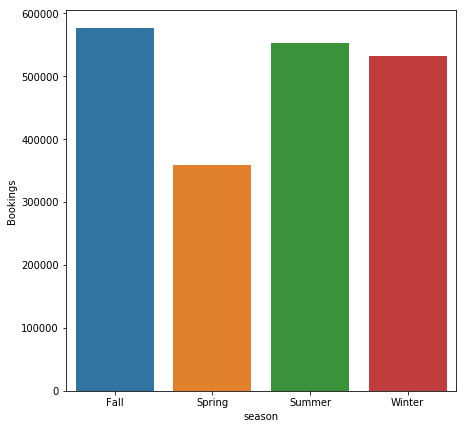

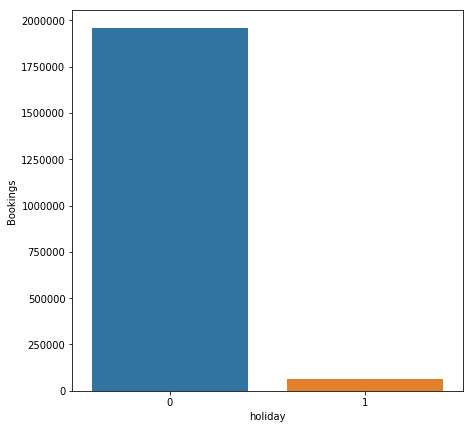

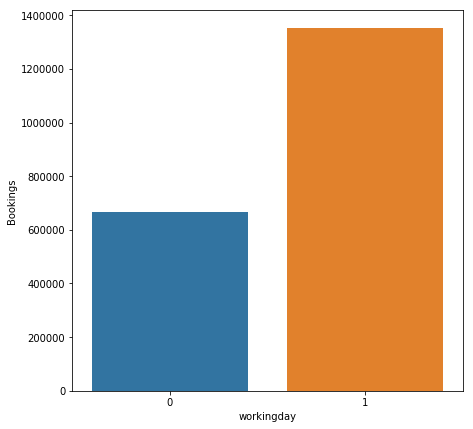

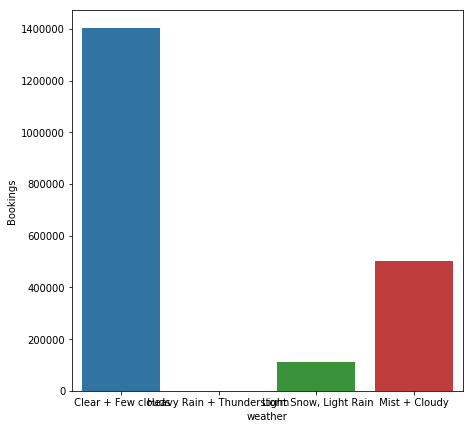

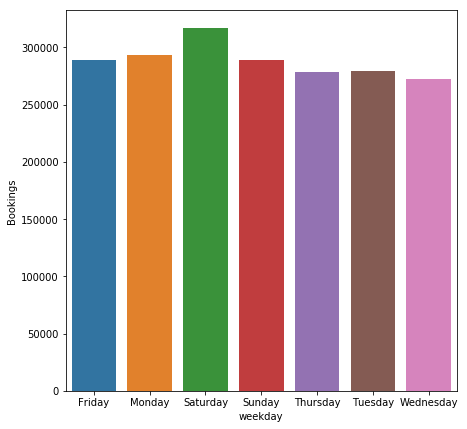

In [22]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(7,7))
    sns.barplot(x=merged[item], y='Bookings', data=merged, estimator=sum, ci=None)

#### Encoding the categorical variables

In [23]:
merged_Dummy = pd.get_dummies(data=merged, columns=['season', 'holiday', 'workingday', 'weather', 'weekday', 'month'], drop_first=True)
print(merged_Dummy.shape)
merged_Dummy.head()

(10769, 33)


datetime   temp   atemp  humidity  windspeed  Bookings        date  \
0    5/2/2012 19:00  22.14  25.760        77    16.9979       504    5/2/2012   
1     9/5/2012 4:00  28.70  33.335        79    19.0012         5    9/5/2012   
2    1/13/2011 9:00   5.74   6.060        50    22.0028       139   1/13/2011   
3  11/18/2011 16:00  13.94  16.665        29     8.9981       209  11/18/2011   
4   9/13/2011 13:00  30.34  33.335        51    19.0012       184   9/13/2011   

  hour  season_Spring  season_Summer  ...  month_December  month_February  \
0   19              0              1  ...               0               0   
1    4              0              0  ...               0               0   
2    9              1              0  ...               0               0   
3   16              0              0  ...               0               0   
4   13              0              0  ...               0               0   

   month_January  month_July  month_June  month_March  month_May  \
0              0           0           0            0          1   
1              0           0           0            0          0   
2              1           0           0            0          0   
3              0           0           0            0          0   
4              0           0           0            0          0   

   month_November  month_October  month_September  
0               0              0                0  
1               0              0                1  
2               0              0                0  
3               1              0                0  
4               0              0                1  

[5 rows x 33 columns]

In [24]:
merged[(merged['workingday'] == 1) & ((merged['weekday'] == 'Sunday') | (merged['weekday'] == 'Saturday'))].shape

(0, 14)

##### Correlation Analysis

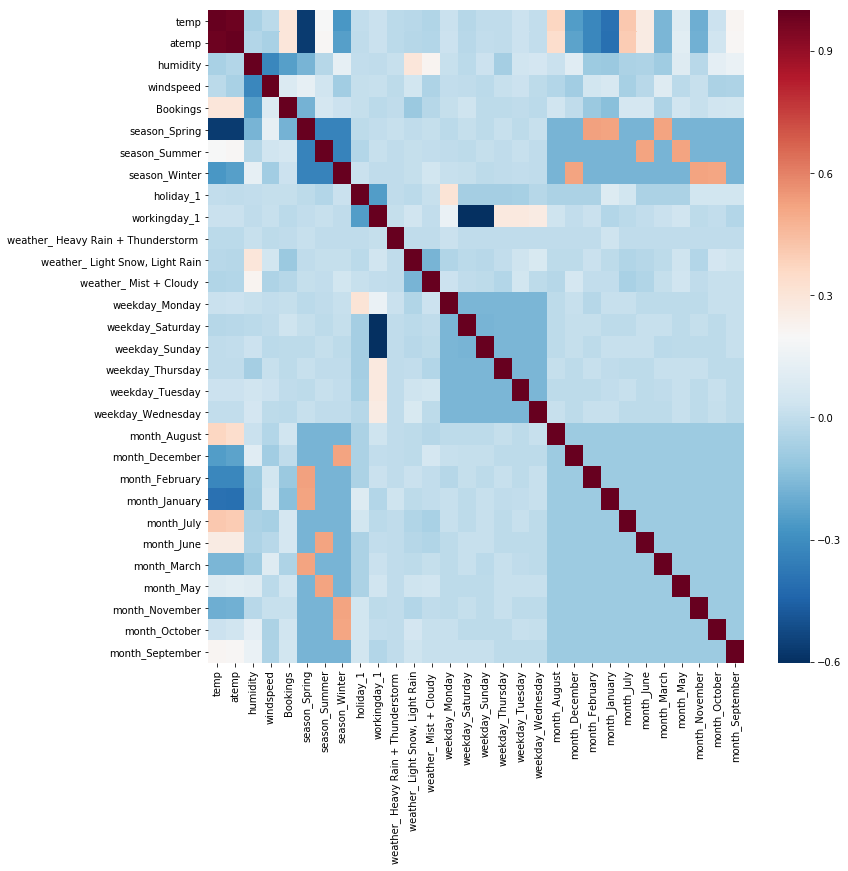

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(merged_Dummy.corr(),cmap='RdBu_r')

##### Dropping few features like atemp, datetime, weekday_Saturday and weekday_Sunday (as these are weekends and considered already in working day) as these are highly correlated to one or other column. datetime column is used in creating new columns.
##### Also dropped the 'weather_ Heavy Rain + Thunderstorm ' column as well. As it is redundant, as it has only one record with this flag as 1.

In [26]:
merged_Dummy.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'Bookings',
       'date', 'hour', 'season_Spring', 'season_Summer', 'season_Winter',
       'holiday_1', 'workingday_1', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [106]:
merged_drop=merged_Dummy.drop(columns={'atemp','datetime', 'weekday_Saturday', 'weekday_Sunday', 'weather_ Heavy Rain + Thunderstorm '})
merged_drop.shape

(10769, 28)

##### Linear Regression does not work on date/datetime type so modifying it.

In [107]:
merged_drop.date = pd.to_datetime(merged_drop.date)
merged_drop.date = merged_drop.date.map(dt.datetime.toordinal)
merged_drop.hour = merged_drop.hour.astype('int64')
merged_Dummy1 = merged_drop
merged_drop = merged_drop.drop(columns='date')

In [108]:
train_df_modulated = merged_drop[:train_test_splitter]
test_df_modulated = merged_drop[train_test_splitter:]

In [109]:
print(train_df_modulated.shape)
print(test_df_modulated.shape)

(8591, 27)
(2178, 27)


## Regression Analysis

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
#import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score, mean_squared_error

In [111]:
y = train_df_modulated['Bookings']
X = train_df_modulated.drop(columns='Bookings', axis=1)
actual_y_test = test_df_modulated['Bookings']
actual_X_test = test_df_modulated.drop(columns='Bookings', axis=1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6872, 26)
(6872,)
(1719, 26)
(1719,)


### Simple Linear Regression

In [36]:
linReg = linear_model.LinearRegression()

In [37]:
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print('Intercept: \n', linReg.intercept_)
print('Coefficients: \n', linReg.coef_)

Intercept: 
 19.363095796921442
Coefficients: 
 [  9.69857929  -1.92245267   0.18968733   6.61806383   9.33757133
  10.71387571  51.95994641  -3.57947543  -4.50495484 119.59601007
 -34.1020295   10.91728726 -11.97295483  -9.86172697 -11.24330861
  -4.35399822 -38.00153205  35.6512425    2.20487846  -2.28006803
 -45.67389532 -20.22959112   9.4127609   27.58835994  14.12180531
   2.1868986   11.66403392]


In [40]:
linReg.score(X_test, y_test)

0.3645086282492107

In [41]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5)

In [42]:
print('scores:: ',scores, '\nmean:: ',np.mean(scores), '\nstd ::', np.std(scores))

scores::  [0.34195657 0.3346155  0.37488481 0.36827618 0.32721324] 
mean::  0.3493892594822163 
std :: 0.01882564012769531


In [43]:
pred1 = linReg.predict(X_test)
pred1 = pd.DataFrame(pred1)
rmse_pred1 = np.sqrt(mean_squared_error(y_test ,pred1))
print(rmse_pred1)

136.56269381193562


## Ensemble Learning

###### Adaboost Regressor

In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold

In [45]:
adaModel = AdaBoostRegressor(n_estimators=200, random_state=6)
adaModel.fit(X,y)
kfold = KFold(n_splits=2, random_state=6)
adaResults = cross_val_score(adaModel, X, y, scoring='r2', cv=kfold)

In [46]:
print(adaResults.mean())
print(adaResults.std())

0.5065887764139045
0.07341858808349572


In [47]:
y2 = adaModel.predict(X)
y2 = pd.DataFrame(y2)
rmse_y2 = np.sqrt(mean_squared_error(y ,y2))
print(rmse_y2)

128.34243772998107


In [48]:
y_pred_actual3 = adaModel.predict(actual_X_test)
y_pred_actual3 = pd.DataFrame(y_pred_actual3)
y_pred_actual3 = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual3))
print(y_pred_actual3)

234.85873483497082


##### AdaBoost with GridSearchCV

In [74]:
ada = AdaBoostRegressor(random_state=6)
param_dist = {
 'n_estimators': np.arange(50,500,50),
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
ada_grid = GridSearchCV(estimator=ada, param_grid=param_dist)


In [75]:
ada_grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=6),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]), 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
ada_grid.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='square',
         n_estimators=100, random_state=6)

In [85]:
ada = AdaBoostRegressor(learning_rate=0.05, loss='square', 
             n_estimators=100, random_state=6)
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
y_ada = pd.DataFrame(y_ada)

In [86]:
rmse_ada = np.sqrt(mean_squared_error(y_test ,y_ada))
print('RMSE for test records: ', rmse_ada)

RMSE for test records:  114.83053500485653


In [80]:
print("R-squared for Train: %.2f" %ada.score(X_train, y_train))
print("R-squared for Test: %.2f" %ada.score(X_test, y_test))

R-squared for Train: 0.55
R-squared for Test: 0.55


### GradientBoost Regressor

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [114]:
#gdbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, loss='ls', max_depth=4)
gdbr = GradientBoostingRegressor()
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [115]:
rmse_gdbr = np.sqrt(mean_squared_error(y_test ,y_gdbr))
print(rmse_gdbr)

80.49316470012255


In [116]:
print(len(X_train.columns))
print(X_train.columns)
print('Feature Importances:: ', np.round(gdbr.feature_importances_,3))

26
Index(['temp', 'humidity', 'windspeed', 'hour', 'season_Spring',
       'season_Summer', 'season_Winter', 'holiday_1', 'workingday_1',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')
Feature Importances::  [0.119 0.036 0.003 0.7   0.03  0.    0.017 0.    0.068 0.02  0.    0.001
 0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.001 0.
 0.001 0.001]


In [117]:
print("R-squared for Train: %.2f" %gdbr.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr.score(X_test, y_test))

R-squared for Train: 0.80
R-squared for Test: 0.78


###### GridSearchCV for parameters selection

In [61]:
params = {'n_estimators':np.arange(350,500,100), 'learning_rate':np.arange(.1,1,.1), 'max_depth':np.arange(1,5,1), 'max_features':np.arange(2,10,1)}
#params = {'n_estimators':np.arange(50,200,50), 'max_depth':np.arange(1,5,1), 'learning_rate':np.arange(.1,1,.1), 'min_samples_leaf':np.arange(1,16,2), 'max_features':np.arange(2,10,1)}

In [62]:
gdbr_grid = GridSearchCV(estimator=gdbr, param_grid=params)

In [63]:
gdbr_grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([350, 450]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'max_depth': array([1, 2, 3, 4]), 'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
gdbr_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
gdbr_grid.best_score_

0.8514642226481192

In [118]:
gdbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
             learning_rate=0.3, loss='ls', min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, random_state=6, tol=0.0001)
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [119]:
gdbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [120]:
rmse_gdbr = np.sqrt(mean_squared_error(y_test ,y_gdbr))
print('RMSE for test records: ', rmse_gdbr)

RMSE for test records:  63.122179692102435


In [121]:
print("R-squared for Train: %.2f" %gdbr.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr.score(X_test, y_test))

R-squared for Train: 0.93
R-squared for Test: 0.86


In [122]:
y_actual_pred = gdbr.predict(actual_X_test)
y_actual_pred = pd.DataFrame(y_actual_pred)
rmse_actual = np.sqrt(mean_squared_error(actual_y_test ,y_actual_pred))

In [123]:
print('RMSE for test records: ', rmse_actual)

RMSE for test records:  247.43353019509877


# Conclusions

##### The time and atime columns are highly correlated, so it is better to drop either of the column for better modelling.
##### The datetime column is divided into multiple columns, like date, day, weekday, month.
##### The Weekday's Saturday and Sunday are just similar to Workday = 0, so removed those columns as well.
##### We have dropped one more column 'weather_ Heavy Rain + Thunderstorm ' as it was having one record with this value. That we have conclude form the visualizations.
##### There were few outliers in the train dataset as the values were greater than the mean + 3*std dev, so removed those rows as well as a part of outlier analysis.

##### Used Linear Regression with AdaBoost Regressor and GradientBoost Regressor for modelling
##### From Feature importances, we can see that the top 5 most important features were, 
    1. hour - 0.7
    2. temp/atemp - 0.119
    3. workingday - 0.068
    4. Humidity - 0.036
    5. Spring Season - 0.03

##### The best method found to be GradientBooster Regressor.
##### Used GridSearchCV to tune the model, which resulted in best params as for GradientBooster Regressor
    1. learning_rate=0.2
    2. n_estimators=450
    3. max_depth=4
    4. max_features=9 etc